In [1]:
import random
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
def exponential(l):
    u = random.random()
    return -math.log(u)/l

In [3]:
lambda_a = 2
lambda_d = 3
n_of_tasks=1000

In [4]:
tasks=[]
for i in range(n_of_tasks):
    tasks.append(exponential(lambda_a))

In [5]:
task_id=0
task_t=tasks[task_id]
t=0
queue=[]
queue.append(t)
serwer_t=exponential(lambda_d)  
executed=0
tasks_in_queue=[]
time_waited=[]
executed_tasks=[]
tasks_in_queue.append([t,len(queue)])

while(executed<n_of_tasks):
    if(task_t<=0 and task_id<n_of_tasks-1):
        queue.append(t)
        tasks_in_queue.append([t,len(queue)])
        task_id+=1
        task_t=tasks[task_id]
    if(len(queue)>0):
        if(serwer_t<=0):
            serwer_t=exponential(lambda_d)
            temp = queue.pop(0)
            #print(executed)
            executed+=1
            time_waited.append(t-temp)
            tasks_in_queue.append([t,len(queue)])
            executed_tasks.append([t,executed])
        serwer_t-=1/3600
        #print(serwer_t)
    task_t-=1/3600
    t+=1/3600

In [6]:
avg_queue=0
time=t
for i in range(len(tasks_in_queue)-1,-1,-1):
    q=tasks_in_queue[i]
    temp=time-q[0]
    avg_queue+=q[1]*temp
    time-=temp
avg_queue=avg_queue/t
print(avg_queue)

1.4856977659675055


In [7]:
avg_waited=0

for i in range(len(time_waited)):
    avg_waited+=time_waited[i]
avg_waited=avg_waited/len(time_waited)
print(avg_waited)

0.7737233333568012


In [8]:
print("E(R)*lambda_a = {}".format(avg_waited*lambda_a))
print("E(N) = {}".format(avg_queue))
print("diff = {}".format(abs(avg_queue-avg_waited*lambda_a)))

E(R)*lambda_a = 1.5474466667136024
E(N) = 1.4856977659675055
diff = 0.06174890074609696


In [12]:
plt.rcParams['figure.figsize'] = [22, 8]

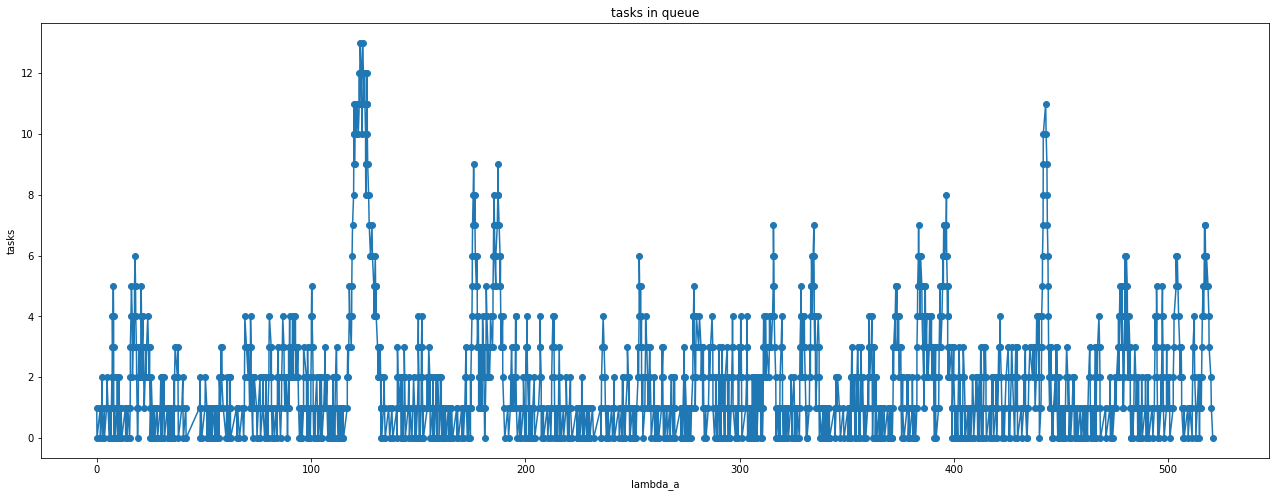

In [13]:
plt.title("tasks in queue")
plt.xlabel("lambda_a")
plt.ylabel("tasks")

plt.plot([x[0] for x in tasks_in_queue], [x[1] for x in tasks_in_queue])
plt.scatter([x[0] for x in tasks_in_queue], [x[1] for x in tasks_in_queue])